<a href="https://colab.research.google.com/github/madhusudanhasbe/Natural_Language_Processing_Lab/blob/main/22070126061_NLP_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1**



```
Name: Madhusudan Hasbe
PRN: 22070126061
TY AIML A3
```





> Github link: https://github.com/madhusudanhasbe/Natural_Language_Processing_Lab/blob/main/22070126061_NLP_Assignment_1.ipynb



--------------

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 84% 68.0M/80.9M [00:01<00:00, 64.6MB/s]
100% 80.9M/80.9M [00:01<00:00, 71.2MB/s]


In [ ]:
!unzip /content/sentiment140.zip

Archive:  /content/sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
import pandas as pd

df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

In [ ]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
!pip install contractions -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.5 MB/s eta 0:00:00


In [ ]:
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
import spacy
import contractions

In [ ]:
nltk.download("all")
!python -m spacy download en_core_web_sm

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 83.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
regexp = RegexpTokenizer("[\w']+")

In [ ]:
def text_lower(text):
    return text.lower()

def remove_whitespace(text):
    return " ".join(text.split())

def remove_http_links(text):
    return re.sub(r'http\S+', '', text)

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_html(text):
    return re.sub(r'<.*?>', '', text)

def remove_emoji(text):
    return text.encode('ascii', 'ignore').decode('ascii')

def convert_contractions(text):
    text = contractions.fix(text)
    return text

def remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

def discard_non_alpha(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    return ' '.join(tokens)

def lemmatize(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    return ' '.join(tokens)

def remove_usernames(text):
    return re.sub(r'@\w+', '', text)

In [ ]:
def text_clean(text):
    text = text_lower(text)
    text = remove_whitespace(text)
    text = re.sub('\n', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = remove_http_links(text)
    text = remove_usernames(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = convert_contractions(text)
    text = remove_stopwords(text)
    text = discard_non_alpha(text)
    text = lemmatize(text)
    return text

In [ ]:
#Testing definition
txt = "Hey there @helloooooo ! 🌟 Have you checked out the latest update on our site? 👉 Visit: https://www.ajio.com now! 🎉 Isn't it amazing how things have changed? 😲 Well, guess what? We're just getting started... 😉 Stay tuned for more, because the best is yet to come!!! 💥💬✨"
print(text_clean(txt))

hey check late update site visit amazing thing change well guess getting start stay tune well yet come


In [ ]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df['cleaned_text'] = df['text'].apply(text_clean)
df.head()

,target,ids,date,flag,user,text,cleaned_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda get david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dive many time ball manage save rest go bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behave mad see


In [ ]:
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv")

In [ ]:
df.head()

,target,ids,date,flag,user,text,cleaned_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda get david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dive many time ball manage save rest go bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behave mad see


In [ ]:
df['cleaned_text'] = df['cleaned_text'].fillna('')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2))
X_count = count_vectorizer.fit_transform(df['cleaned_text'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Split data
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, df['target'], test_size=0.3, random_state=42, stratify = df['target'])

Logistic Regression with CountVectorizer
              precision    recall  f1-score   support

           0       0.78      0.73      0.75    240000
           4       0.75      0.80      0.77    240000

    accuracy                           0.76    480000
   macro avg       0.76      0.76      0.76    480000
weighted avg       0.76      0.76      0.76    480000



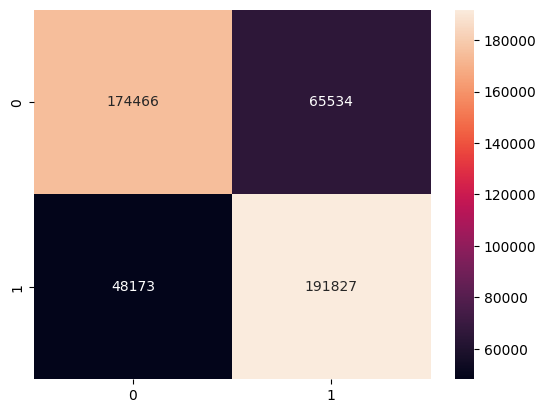

In [ ]:
# Logistic Regression with CountVectorizer
lr_count = LogisticRegression(max_iter=1000, penalty='l2', C=1.0, solver='saga')
lr_count.fit(X_train_count, y_train)
y_pred_count = lr_count.predict(X_test_count)

# Classification Report and Confusion Matrix
print("Logistic Regression with CountVectorizer")
print(classification_report(y_test, y_pred_count))
cm_count = confusion_matrix(y_test, y_pred_count)
sns.heatmap(cm_count, annot=True, fmt='d')
plt.show()

In [ ]:
# Split data
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, df['target'], test_size=0.3, random_state=42, stratify = df['target'])

Logistic Regression with TFIDFVectorizer
              precision    recall  f1-score   support

           0       0.78      0.74      0.76    240000
           4       0.75      0.79      0.77    240000

    accuracy                           0.76    480000
   macro avg       0.76      0.76      0.76    480000
weighted avg       0.76      0.76      0.76    480000



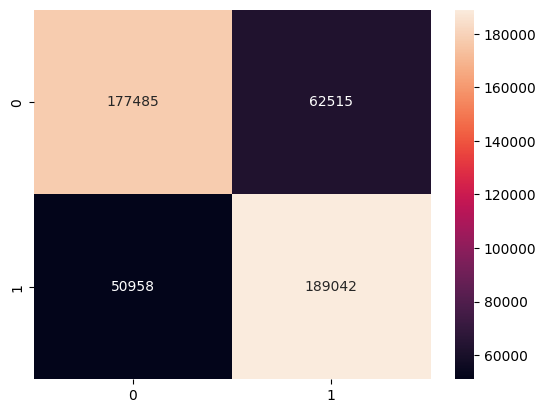

In [ ]:
# Logistic Regression with TFIDFVectorizer
lr_tfidf = LogisticRegression(max_iter=1000, penalty='l2', C=1.0, solver='saga')
lr_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)

# Classification Report and Confusion Matrix
print("Logistic Regression with TFIDFVectorizer")
print(classification_report(y_test, y_pred_tfidf))
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
sns.heatmap(cm_tfidf, annot=True, fmt='d')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Random Forest with CountVectorizer
              precision    recall  f1-score   support

           0       0.77      0.56      0.65    240000
           4       0.66      0.83      0.73    240000

    accuracy                           0.70    480000
   macro avg       0.71      0.70      0.69    480000
weighted avg       0.71      0.70      0.69    480000



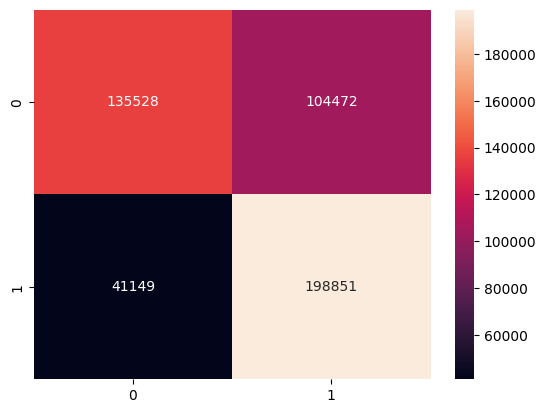

In [ ]:
# Random Forest with CountVectorizer
rf_count = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', bootstrap=True, random_state=42)
rf_count.fit(X_train_count, y_train)
y_pred_count_rf = rf_count.predict(X_test_count)

print("Random Forest with CountVectorizer")
print(classification_report(y_test, y_pred_count_rf))
cm_count_rf = confusion_matrix(y_test, y_pred_count_rf)
sns.heatmap(cm_count_rf, annot=True, fmt='d')
plt.show()

Random Forest with TFIDFVectorizer
              precision    recall  f1-score   support

           0       0.73      0.61      0.66    240000
           4       0.66      0.78      0.72    240000

    accuracy                           0.69    480000
   macro avg       0.70      0.69      0.69    480000
weighted avg       0.70      0.69      0.69    480000



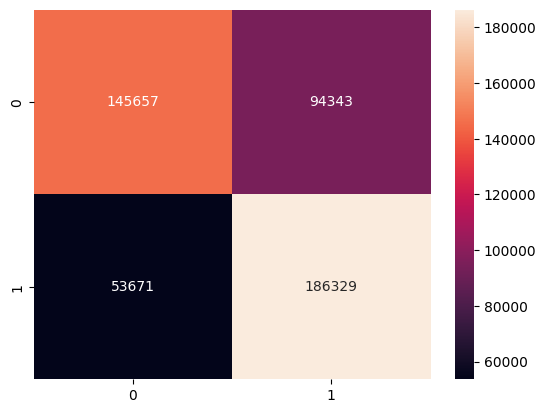

In [ ]:
# Random Forest with TFIDFVectorizer
rf_tfidf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', bootstrap=True, random_state=42)
rf_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf_rf = rf_tfidf.predict(X_test_tfidf)

print("Random Forest with TFIDFVectorizer")
print(classification_report(y_test, y_pred_tfidf_rf))
cm_tfidf_rf = confusion_matrix(y_test, y_pred_tfidf_rf)
sns.heatmap(cm_tfidf_rf, annot=True, fmt='d')
plt.show()

In [ ]:
from sklearn.svm import SVC

SVC with CountVectorizer
              precision    recall  f1-score   support

           0       0.71      0.69      0.70    240000
           4       0.70      0.72      0.71    240000

    accuracy                           0.70    480000
   macro avg       0.70      0.70      0.70    480000
weighted avg       0.70      0.70      0.70    480000



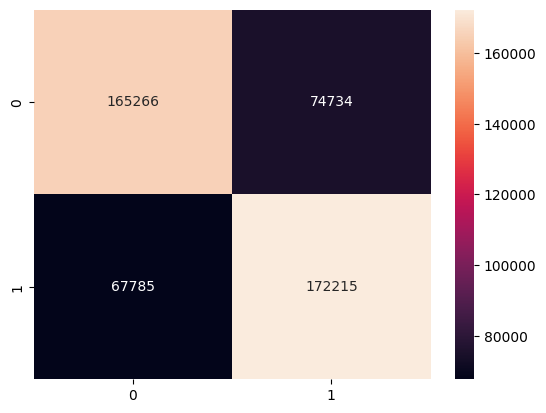

In [ ]:
# SVC with CountVectorizer
svc_count = SVC(C=1.0, kernel='linear', gamma='scale', probability=False, random_state=42)
svc_count.fit(X_train_count, y_train)
y_pred_count_svc = svc_count.predict(X_test_count)

# Classification Report and Confusion Matrix
print("SVC with CountVectorizer")
print(classification_report(y_test, y_pred_count_svc))
cm_count_svc = confusion_matrix(y_test, y_pred_count_svc)
sns.heatmap(cm_count_svc, annot=True, fmt='d')
plt.show()

SVC with TFIDFVectorizer
              precision    recall  f1-score   support

           0       0.72      0.70      0.71    240000
           4       0.71      0.73      0.72    240000

    accuracy                           0.71    480000
   macro avg       0.71      0.71      0.71    480000
weighted avg       0.71      0.71      0.71    480000



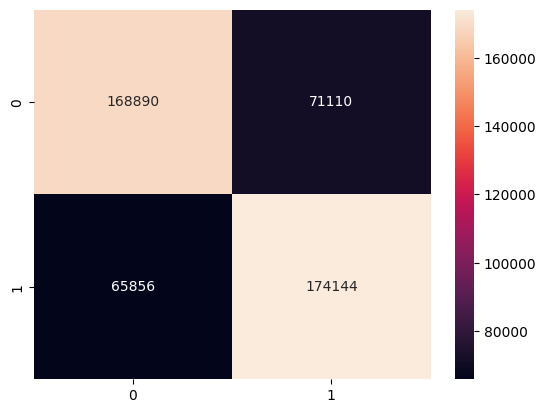

In [ ]:
# SVC with TFIDFVectorizer
svc_tfidf = SVC(C=1.0, kernel='linear', gamma='scale', probability=False, random_state=42)
svc_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf_svc = svc_tfidf.predict(X_test_tfidf)

# Classification Report and Confusion Matrix
print("SVC with TFIDFVectorizer")
print(classification_report(y_test, y_pred_tfidf_svc))
cm_tfidf_svc = confusion_matrix(y_test, y_pred_tfidf_svc)
sns.heatmap(cm_tfidf_svc, annot=True, fmt='d')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1],
    'solver': ['liblinear', 'saga']
}

In [ ]:
# Initialize GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=3, n_jobs=-1)
grid_search_lr.fit(X_train_count, y_train)

# Best parameters and score
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best cross-validation score for Logistic Regression:", grid_search_lr.best_score_)

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression: 0.7623455355074338


In [ ]:
# Logistic Regression with TFIDFVectorizer
grid_search_lr_tfidf = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=3, n_jobs=-1)
grid_search_lr_tfidf.fit(X_train_tfidf, y_train)
print("Best parameters for Logistic Regression (TFIDF):", grid_search_lr_tfidf.best_params_)
print("Best cross-validation score for Logistic Regression (TFIDF):", grid_search_lr_tfidf.best_score_)

Best parameters for Logistic Regression (TFIDF): {'C': 1, 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression (TFIDF): 0.7629080353280662


In [ ]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None]
}

In [ ]:
# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1)
grid_search_rf.fit(X_train_count, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score for Random Forest:", grid_search_rf.best_score_)

Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}
Best cross-validation score for Random Forest: 0.7272900424450336


In [ ]:
# Random Forest with TFIDFVectorizer
grid_search_rf_tfidf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1)
grid_search_rf_tfidf.fit(X_train_tfidf, y_train)
print("Best parameters for Random Forest (TFIDF):", grid_search_rf_tfidf.best_params_)
print("Best cross-validation score for Random Forest (TFIDF):", grid_search_rf_tfidf.best_score_)

Best parameters for Random Forest (TFIDF): {'max_depth': None, 'n_estimators': 100}
Best cross-validation score for Random Forest (TFIDF): 0.7307400340458076


In [ ]:
# Define parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

In [ ]:
# Initialize GridSearchCV for SVC
grid_search_svc = GridSearchCV(SVC(random_state=42), param_grid_svc, cv=3, n_jobs=-1)
grid_search_svc.fit(X_train_count, y_train)

# Best parameters and score
print("Best parameters for SVC:", grid_search_svc.best_params_)
print("Best cross-validation score for SVC:", grid_search_svc.best_score_)

Best parameters for SVC: {'C': 1, 'kernel': 'rbf'}
Best cross-validation score for SVC: 0.74114012139534


In [ ]:
# SVC with TFIDFVectorizer
grid_search_svc_tfidf = GridSearchCV(SVC(random_state=42), param_grid_svc, cv=3, n_jobs=-1)
grid_search_svc_tfidf.fit(X_train_tfidf, y_train)
print("Best parameters for SVC (TFIDF):", grid_search_svc_tfidf.best_params_)
print("Best cross-validation score for SVC (TFIDF):", grid_search_svc_tfidf.best_score_)

Best parameters for SVC (TFIDF): {'C': 1, 'kernel': 'rbf'}
Best cross-validation score for SVC (TFIDF): 0.7402200917940119


---------------------

Final Comparison of Accuracy:
1. Logistic Regression:
  1.   Count Vectoriser:\
    a. Without CV: 0.76\
    b. After CV: 0.7623
  2.   TFIDF Vectoriser:\
    a. Without CV: 0.76\
    b. After CV: 0.7629
2. SVC:
  1.   Count Vectoriser:\
    a. Without CV: 0.70\
    b. After CV: 0.7411
  2.   TFIDF Vectoriser:\
    a. Without CV: 0.71\
    b. After CV: 0.7402
3. Random Forest:
  1.   Count Vectoriser:\
    a. Without CV: 0.70\
    b. After CV: 0.7272
  2.   TFIDF Vectoriser:\
    a. Without CV: 0.69\
    b. After CV: 0.7307



In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [ ]:
!jupyter nbconvert --to PDF "/content/drive/My Drive/Colab Notebooks/22070126061_NLP_Assignment_1.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/22070126061_NLP_Assignment_1.ipynb to PDF
[NbConvertApp] Support files will be in 22070126061_NLP_Assignment_1_files/
[NbConvertApp] Making directory ./22070126061_NLP_Assignment_1_files
[NbConvertApp] Making directory ./22070126061_NLP_Assignment_1_files
[NbConvertApp] Making directory ./22070126061_NLP_Assignment_1_files
[NbConvertApp] Making directory ./22070126061_NLP_Assignment_1_files
[NbConvertApp] Making directory ./22070126061_NLP_Assignment_1_files
[NbConvertApp] Making directory ./22070126061_NLP_Assignment_1_files
[NbConvertApp] Writing 122464 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 178466 bytes to /cont